In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.multicomp as mc


In [2]:
df = pd.read_excel('social_data.xlsx') # read in data
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [3]:
missing_values = len(df[df['Total Impressions'] == 0]) # number of records that do not have any impressions
print(f'There are {missing_values} rows that are missing data')

There are 744 rows that are missing data


There are 744 records that are missing data. Since this would greatly skew our analysis, we will only be using rows that do not have missing values.

In [4]:
df = df[df['Total Impressions'] != 0].copy() # exclude records with 0 impressions
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video
10,2023-03-31 18:36:01.000,General,FBPAGE,Community Engagement,37692,8044,Photo


## Question 1

What is the typical engagement rate we can expect? What’s the likelihood that we can
achieve a 15% engagement rate?

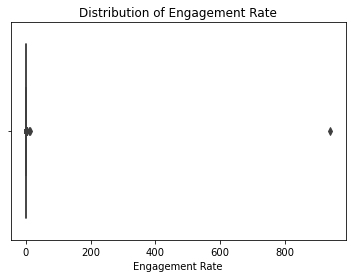

In [5]:
df['Engagement Rate'] = df['Total Engagements'] / df['Total Impressions'] # create column for engagement rate
sns.boxplot(data = df, x ='Engagement Rate') # distribution of Engagement Rate
plt.title('Distribution of Engagement Rate')
plt.savefig('q1_graph1', bbox_inches = 'tight')
plt.show()

In [6]:
df[df['Engagement Rate'] >= 1] # look at posts that have engagement rate greater than 1

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,N/A,1,940,Photo,940.000000
1586,2023-02-23 06:18:27,General,FBPAGE,N/A,1,1,Photo,1.000000
3216,2023-01-19 06:02:34,General,FBPAGE,N/A,5,44,Photo,8.800000
3457,2023-01-05 11:55:44,General,FBPAGE,N/A,300,3776,Photo,12.586667


From the chart, we can see that there are some records that have an engagement rate over 1. Since this is not possible, we know that there are some errors in the data. We can see that the data for the 4 records above do not contain accurate data, as engagements are higher than impressions. These rows will be dropped. 

In [7]:
df = df[df['Engagement Rate'] < 1].copy() # filter out rows with incorrect data
df.reset_index(inplace = True, drop = True) # reset index

engagement_rate = df['Engagement Rate'].mean() # calculate average engagement rate 
print('Average Engagement Rate: ' + str(round(engagement_rate * 100,2)) + '%')

median_engagement = df['Engagement Rate'].median() # calculate average engagement rate 
print('Median Engagement Rate: ' + str(round(median_engagement * 100,2)) + '%')

Average Engagement Rate: 5.31%
Median Engagement Rate: 3.08%


In [8]:
eng_prob = round(len(df[df['Engagement Rate'] >= .15]) / len(df) * 100,2) # probability to achieve 15% engagement rate
print(f'There is a {eng_prob}% chance that we can achieve a 15% engagement rate')

There is a 8.13% chance that we can achieve a 15% engagement rate


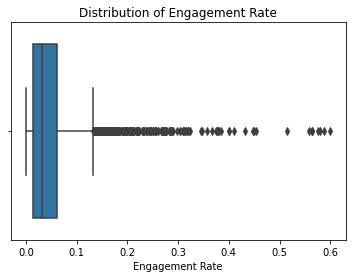

In [9]:
sns.boxplot(data = df, x ='Engagement Rate') # distribution of Engagement Rate
plt.title('Distribution of Engagement Rate')
plt.savefig('q1_graph2', bbox_inches = 'tight')
plt.show()

Based on this analysis, we can expect an average engagement rate of 5.31%. There is a likelihood of 8.13% that we can achieve a 15% engagement rate. 

## Question 2

Does day of the week and time of posting affect engagement rates?

In [10]:
def create_bar_plot(df, x, y, chart_type, figsize = (12,7)):
    if chart_type == 'average':
        df = df.groupby(x).mean().sort_values(y)
        title = f'Average {y} by {x}'
    elif chart_type == 'total':
        df = df.groupby(x).sum().sort_values(y)
        title = f'{y} by {x}' 
    plt.figure(figsize=figsize)
    barplot = sns.barplot(data = df, x = df.index, y=y, palette = 'Blues', ci=None)
    plt.title(title, fontsize=20)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.xticks(fontsize=14)

    y_values = [bar.get_height() for bar in barplot.patches]
    if y != 'Engagement Rate':
        for i, v in enumerate(y_values):
            plt.text(i, v, '{:,}'.format(float(round(v,2))), ha='center', va='bottom', fontsize=12)
    else:
        for i, v in enumerate(y_values):
            plt.text(i, v, f'{str(round(v*100,2))}%', ha='center', va='bottom', fontsize=12)        

In [11]:
df.dtypes # look at data types

Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions             int64
Total Engagements             int64
Media Type                   object
Engagement Rate             float64
dtype: object

In [12]:
# Extract the day of the week
df['Year'] = df['Published Date'].dt.year

# Extract the day of the week
df['Day of Week'] = df['Published Date'].dt.dayofweek

# Extract the hour
df['Hour'] = df['Published Date'].dt.hour

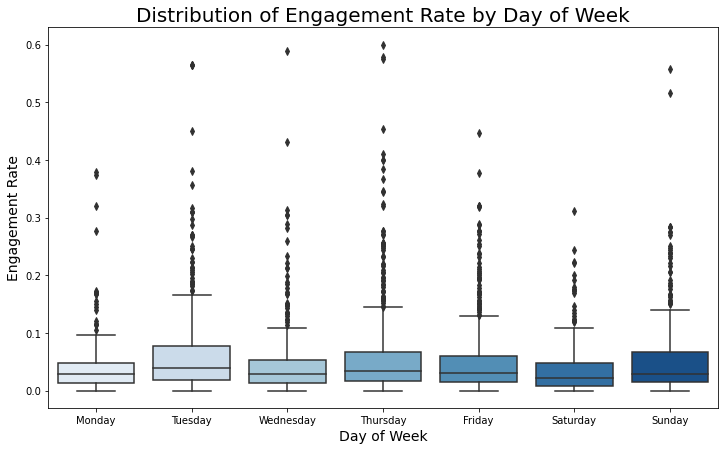

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(data = df, x = 'Day of Week', y = 'Engagement Rate', palette = 'Blues')
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.xticks(ticks=range(len(day_labels)), labels=day_labels) # replace the x-axis labels
plt.title('Distribution of Engagement Rate by Day of Week', fontsize = 20) # set chart title
plt.xlabel('Day of Week',fontsize = 14) # format font size for x label
plt.ylabel('Engagement Rate', fontsize = 14) # format font size for y label
plt.savefig('q2_graph1', bbox_inches = 'tight')
plt.show()

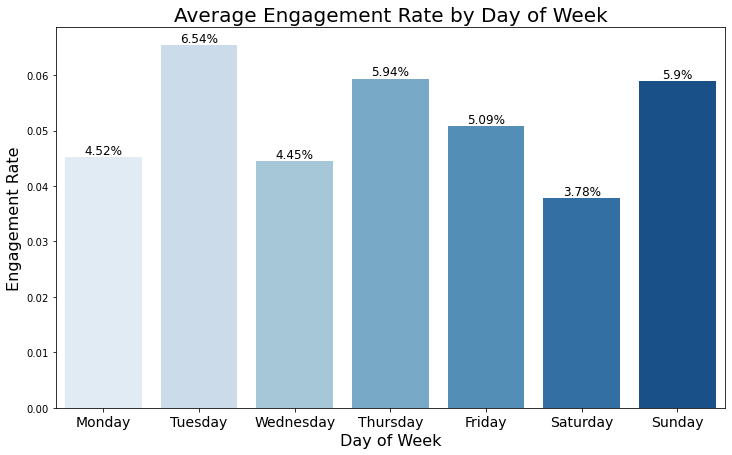

In [14]:
create_bar_plot(df, x = 'Day of Week', y = 'Engagement Rate', chart_type = 'average')
plt.xticks(ticks=range(len(day_labels)), labels=day_labels)
plt.show()

Looking at the distributions of engagement rate by day of week, we cannot see any noticeable differences in engagement rate. Tuesday has the highest average engagement rate at 6.54% but it is not significantly higher than Sunday and Thursday. To check if there is a statistical difference, we will run a one-way ANOVA test. We will check the differences between days and compare weekdays and weekend. 

In [15]:
# ANOVA test
grouped_data = [group['Engagement Rate'] for _, group in df.groupby('Day of Week')]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# display ANOVA results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 7.113086361104697
p-value: 1.5478419879663565e-07


In [16]:
# multiple comparisons
comp = mc.MultiComparison(df['Engagement Rate'], df['Day of Week'])

# tukey's HSD test
result = comp.tukeyhsd()

print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0202 0.0152  0.0023   0.038   True
     0      2  -0.0006    0.9 -0.0185  0.0173  False
     0      3   0.0142 0.1851  -0.003  0.0314  False
     0      4   0.0057    0.9 -0.0115  0.0229  False
     0      5  -0.0074    0.9  -0.027  0.0122  False
     0      6   0.0138 0.3513 -0.0056  0.0332  False
     1      2  -0.0208  0.001 -0.0347 -0.0069   True
     1      3   -0.006 0.8017  -0.019   0.007  False
     1      4  -0.0145 0.0166 -0.0274 -0.0016   True
     1      5  -0.0276  0.001 -0.0436 -0.0116   True
     1      6  -0.0064 0.8957 -0.0221  0.0093  False
     2      3   0.0148 0.0141  0.0018  0.0279   True
     2      4   0.0063 0.7515 -0.0066  0.0193  False
     2      5  -0.0067 0.8701 -0.0228  0.0093  False
     2      6   0.0144 0.0977 -0.0013  0.0302  False
     3      4  -0.0085 0.3621 -0.0205  0.0035 

As we can see from the Tukey test, some of the days have statistical differences. However, the differences are incredibly minimal and not worth pursuing further. Now, we will test the difference between weekend and weekdays.

In [17]:
df['Weekend'] = [1 if x >= 5 else 0 for x in df['Day of Week']]

# ANOVA test
grouped_data = [group['Engagement Rate'] for _, group in df.groupby('Weekend')]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# ANOVA results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 2.7038602414156796
p-value: 0.10022078044557522


P-value is .1 which means we fail to reject the null hypothesis that there is a difference in average engagement rate between the weekend and weekdays

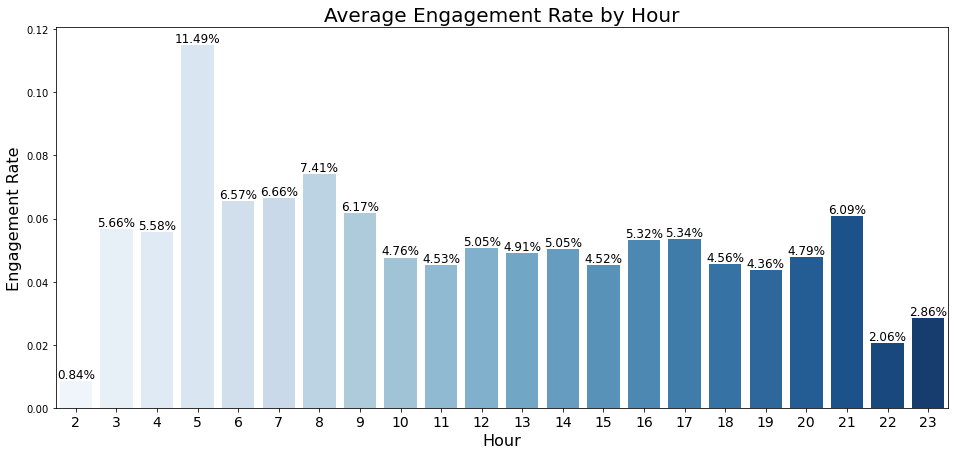

In [18]:
create_bar_plot(df, x = 'Hour', y = 'Engagement Rate', chart_type = 'average', figsize = (16,7))
plt.savefig('q2_graph2', bbox_inches = 'tight')
plt.show()

From looking at the distribution of average engagement rate per hour, it is apparent that posts between the hours of 3AM and 9 AM have a higher engagement rate, peaking at 5 AM. This makes sense as 5 AM PST is 8 AM EST, which is when a large percentage of people get their day started. It's clear that posting at 5AM would have a substantially different engagement rate, but does this carry over to the morning as a whole? We will break up the hour column into 3 categories from midnight to 8 am, 8 am to 4 pm and 4pm to midnight. We will then use a one-way ANOVA to see if there is a statistically significant difference in the average engagement rate between the hour groupings. 

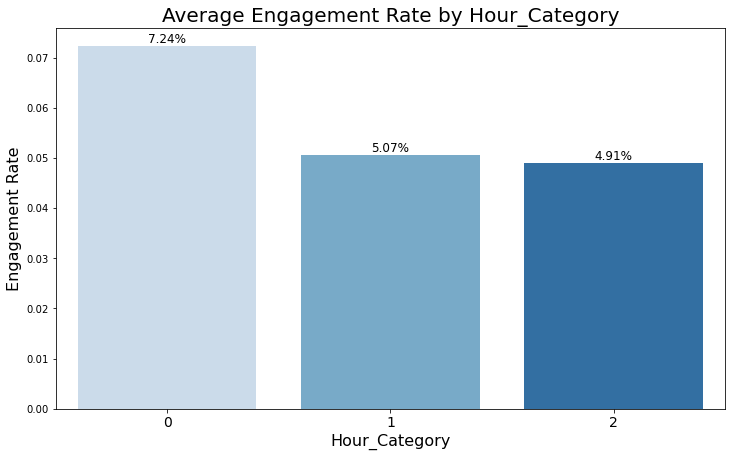

In [19]:
df['Hour_Category'] = [0 if x <= 8 else 1 if x <= 16 else 2 for x in df['Hour']] # create hour categories
create_bar_plot(df, x = 'Hour_Category', y = 'Engagement Rate', chart_type = 'average')
plt.savefig('q2_graph3', bbox_inches = 'tight')
plt.show()

Looking at this bar chart, it does appear that posting in the morning does return a higher engagement rate on average. 

In [20]:
# Perform ANOVA test
grouped_data = [group['Engagement Rate'] for _, group in df.groupby('Hour_Category')]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Display the ANOVA results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 14.871801381663557
p-value: 3.7689029419481746e-07


In [21]:
# Create an object for multiple comparisons
comp = mc.MultiComparison(df['Engagement Rate'], df['Hour_Category'])

# Perform Tukey's HSD test
result = comp.tukeyhsd()

# Display the pairwise comparison results
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0217 0.001 -0.0313 -0.0122   True
     0      2  -0.0233 0.001 -0.0359 -0.0108   True
     1      2  -0.0016   0.9 -0.0112   0.008  False
---------------------------------------------------


From the Tukey test, we can see that group 0 (midnight - 8 am) does have a statistically different average engagement rate than the midday and afternoon hour categories. While we couldn't find anything significant with the day of the week, it is clear that posting from midnight to 8 am is the best course of action to get a higher engagement rate. 

In [22]:
df.groupby('Hour_Category').count().iloc[:,0] # number of posts in each hour category

Hour_Category
0     335
1    2065
2     331
Name: Published Date, dtype: int64

In [23]:
335 / df.groupby('Hour_Category').count().iloc[:,0].sum() # percentage of posts that are posted in the morning

0.1226656902233614

Looking at the number of posts in each hour category, we can see that the overwhelming majority are posted from 8 am to 4 pm. It makes sense to post during normal working hours.However, posts from midnight to 8 am only make up about 12% of all posts, but have a nearly 50% higher average engagement rate. There is a difference based on time of day, and it should be explored more. 

## Question 3
How are our game titles doing in terms of social performance? Is there a specific game
we should focus more on or less?

In [24]:
df['Account'].unique() # check what game titles are in dataset

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [25]:
df_games = df[df['Account'].isin(['CSGO','DOTA2','Valorant'])] # create separate dataframe just containing posts of game titles
df_games.groupby('Account').count().iloc[:,0]

Account
CSGO        198
DOTA2       698
Valorant     34
Name: Published Date, dtype: int64

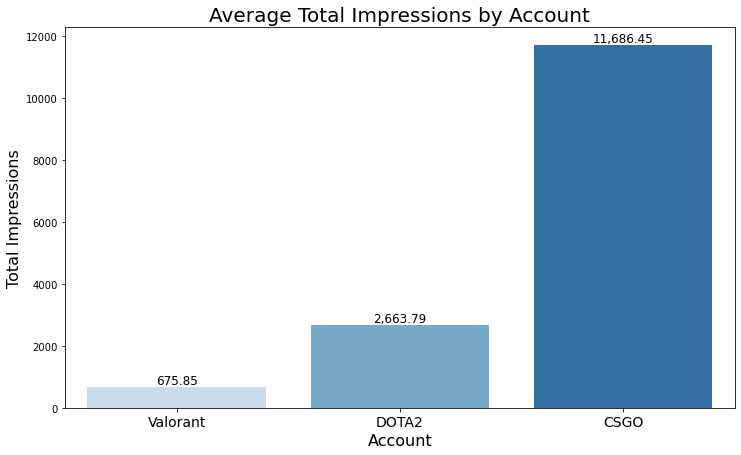

In [26]:
create_bar_plot(df_games, x = 'Account', y = 'Total Impressions', chart_type = 'average')
plt.savefig('q3_graph1', bbox_inches = 'tight')
plt.show()

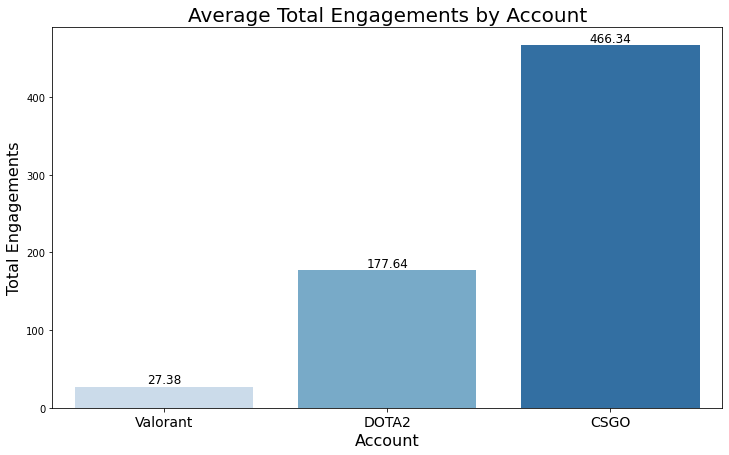

In [27]:
create_bar_plot(df_games, x = 'Account', y = 'Total Engagements', chart_type = 'average')
plt.savefig('q3_graph2', bbox_inches = 'tight')
plt.show()

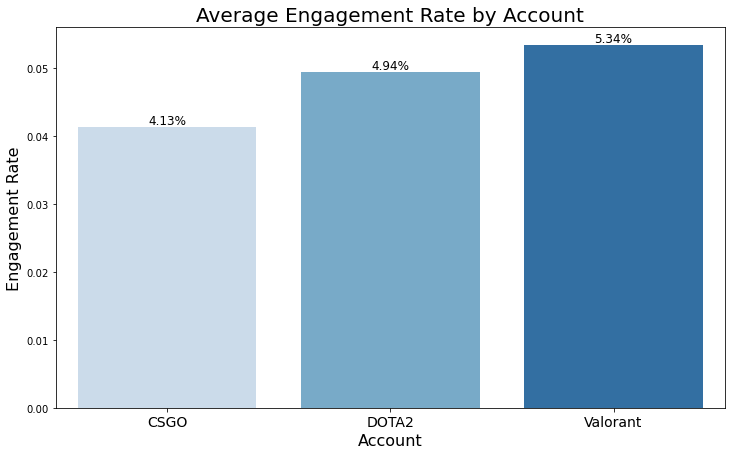

In [28]:
create_bar_plot(df_games, x = 'Account', y = 'Engagement Rate', chart_type = 'average')
plt.savefig('q3_graph3', bbox_inches = 'tight')

plt.show()

In [29]:
df_games['Year'].unique() # check if data is biased towards accounts that have been posting longer

array([2023])

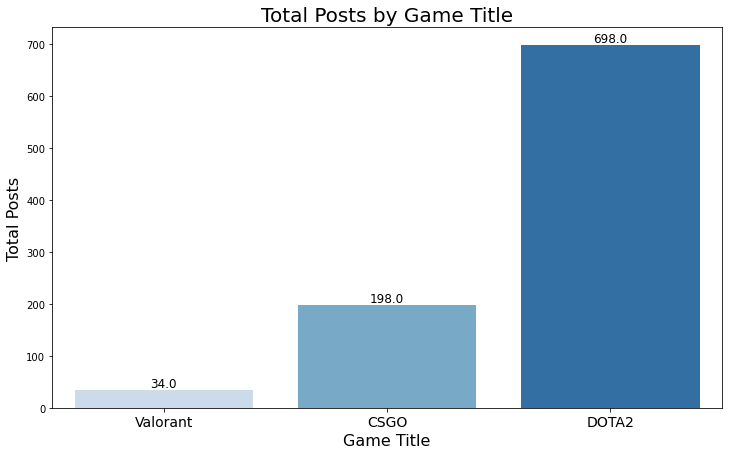

In [30]:
game_avg_er = df_games.groupby('Account').count().sort_values('Engagement Rate')

plt.figure(figsize=(12, 7))
barplot = sns.barplot(data = game_avg_er, x = game_avg_er.index, y='Engagement Rate', palette = 'Blues', ci=None)
plt.title('Total Posts by Game Title', fontsize=20)
plt.xlabel('Game Title', fontsize=16)
plt.ylabel('Total Posts', fontsize=16)
plt.xticks(fontsize=14)

y_values = [bar.get_height() for bar in barplot.patches]

for i, v in enumerate(y_values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
plt.savefig('q3_graph4', bbox_inches = 'tight')

plt.show()

The Counter Strike Global Offensive account gets exponentially higher impressions and engagements, considering both the average and total count of impressions/engagements. However, what is especially interesting is that when we look at the average engagement rate, we can see that Valorant has the highest at 5.34%. CSGO actually has the lowest of the 3 game titles at 4.13%. While the Valorant account may not get as much exposure, the results indicate that it has a more engaged and loyal fan base and therefore should have more posts. When looking at the total posts from each account, it was possible that the results would be biased from an account having existed longer. However, since all of the posts are from the same year, we can see that the majority social media efforts have gone towards posts for the DOTA 2 account. Relative to the other game titles, DOTA 2 has an acceptable engagement rate. However, we must still consider that total exposure is important for the EG brand as a whole. The number of impressions and engagements are not at a satisfactory level given how many resources go into the DOTA 2 account. Therefore, more focus should be put into expanding the Valorant account as it has the highest engagement rate. The CSGO account brings great exposure to the team, so more focus should be put into raising the engagement rate for the posts about CSGO. Finally, there should be a lower focus on the DOTA 2 account because the resources going into posting that much are not returning enough exposure and engagement compared to the other two game titles. 

## Question 4
What media type performs the best?

We will define the best performance based on average engagement rate, total impressions, average impressions per post, total engagments, and average engagements per post

In [31]:
df['Media Type'].value_counts()

Photo       1241
Video        886
Text         548
Link          41
Carousel       9
Mixed          5
Album          1
Name: Media Type, dtype: int64

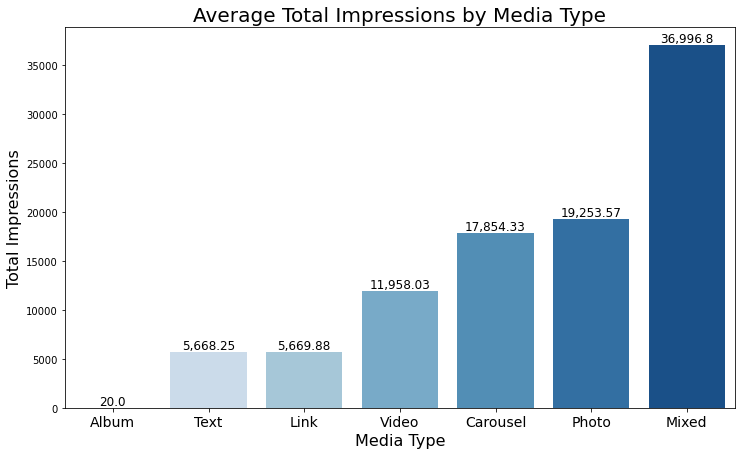

In [32]:
create_bar_plot(df, x = 'Media Type', y = 'Total Impressions', chart_type = 'average')
plt.savefig('q4_graph1', bbox_inches = 'tight')
plt.show()

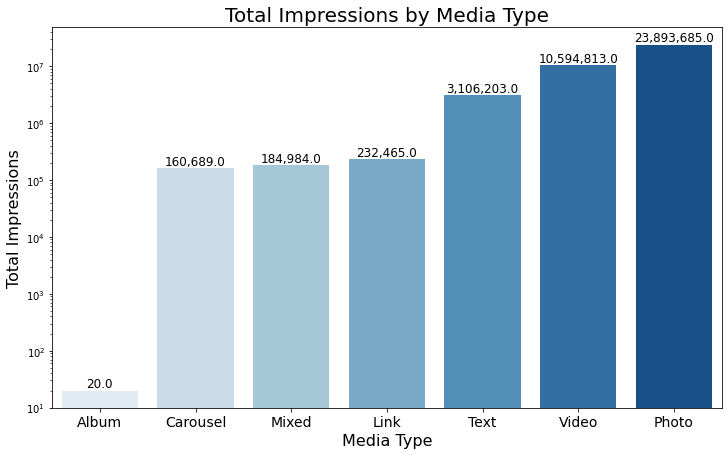

In [33]:
create_bar_plot(df, x = 'Media Type', y = 'Total Impressions', chart_type = 'total')    
plt.yscale('log')
plt.savefig('q4_graph2', bbox_inches = 'tight')

plt.show()

Mixed content has the best average impressions per post by far at about 36,996. This is nearly double the average impressions per post of photos, which is the 2nd highest at 19,253. Just from looking at the total impressions, its clear that the majority of posts use the photo media type as it has about 24,000,000 total impressions. What is also interesting is that carousel has the third highest average impressions at 17,854 but the 2nd least total impressions at 160,689. While there are not many posts that use this media type, based on the high number of average impressions it is worth exploring more. 

### Total Engagements

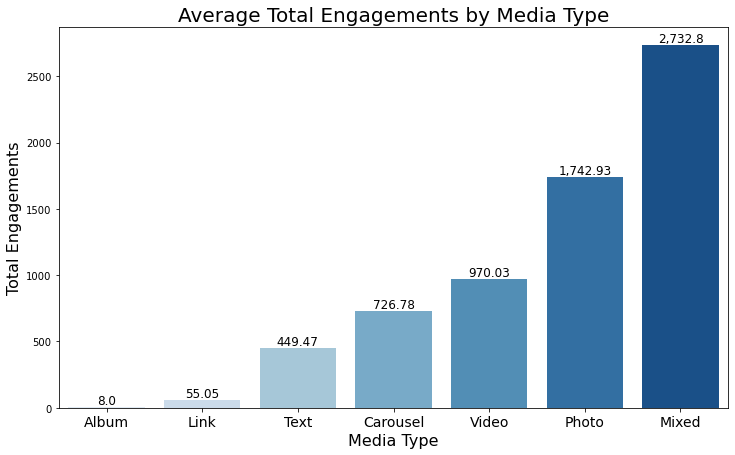

In [34]:
create_bar_plot(df, x = 'Media Type', y = 'Total Engagements', chart_type = 'average')
plt.savefig('q4_graph3', bbox_inches = 'tight')

plt.show()

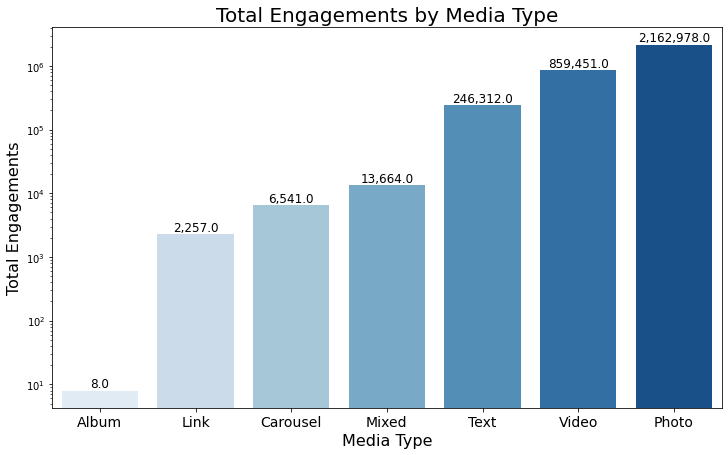

In [35]:
create_bar_plot(df, x = 'Media Type', y = 'Total Engagements', chart_type = 'total')    
plt.yscale('log')
plt.savefig('q4_graph4', bbox_inches = 'tight')

plt.show()

### Average Engagement Rate

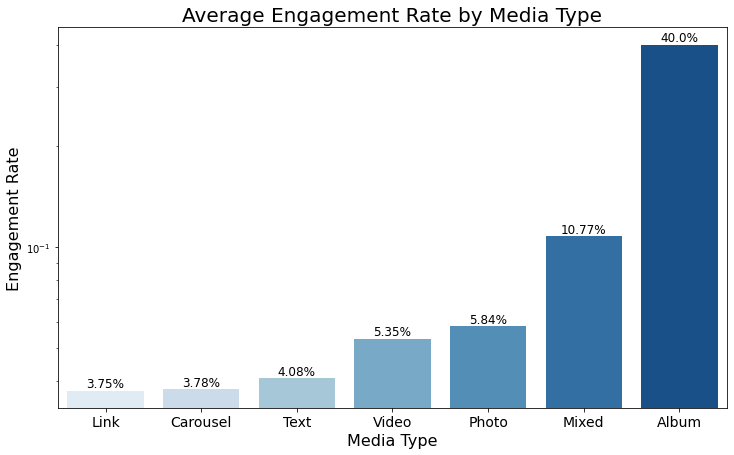

In [36]:
create_bar_plot(df, x = 'Media Type', y = 'Engagement Rate', chart_type = 'average')
plt.yscale('log')
plt.savefig('q4_graph5', bbox_inches = 'tight')

plt.show()

The album media type has the highest average engagement rate, but as stated before, there is only one data point with the album media type and it likely has incorrect data. The mixed media type has the highest average engagement rate at 10.77%. All of the signs point to mixed being the most engaging type of post. However, if we look at the posts that have the mixed media type, we can see that there are only 5 in the dataset so this likely presents a skewed picture. While we also said that the carousel media type would be a category of interest, the low engagement rate indicates that it may be more useful for exposure, rather than engagement.

In [37]:
df[df['Media Type'] == 'Mixed']

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Year,Day of Week,Hour,Weekend,Hour_Category
862,2023-03-03 09:21:22.298,DOTA2,TWITTER,N/A,6900,1040,Mixed,0.150725,2023,4,9,0,1
1628,2023-02-15 10:36:25.629,General,TWITTER,Evil Exhibited,98264,7122,Mixed,0.072478,2023,2,10,0,1
1963,2023-02-03 16:33:52.978,General,TWITTER,Community Engagement,13178,861,Mixed,0.065336,2023,4,16,0,1
2323,2023-01-24 16:44:24.254,DOTA2,TWITTER,Community Engagement,2028,373,Mixed,0.183925,2023,1,16,0,1
2465,2023-01-21 13:06:54.327,General,TWITTER,N/A,64614,4268,Mixed,0.066054,2023,5,13,1,1


## Question 5
What is our best performing campaign?

In [38]:
df['Campaign Name'].unique()

array(['Community Engagement ', 'N/A ', 'Evergreen ', 'Evil Exhibited '],
      dtype=object)

In [39]:
df['Campaign Name'] = df['Campaign Name'].str.strip()
df['Campaign Name'] = df['Campaign Name'].replace({'N/A':'Unknown'})
df['Campaign Name'].value_counts()

Community Engagement    1379
Unknown                  798
Evil Exhibited           393
Evergreen                161
Name: Campaign Name, dtype: int64

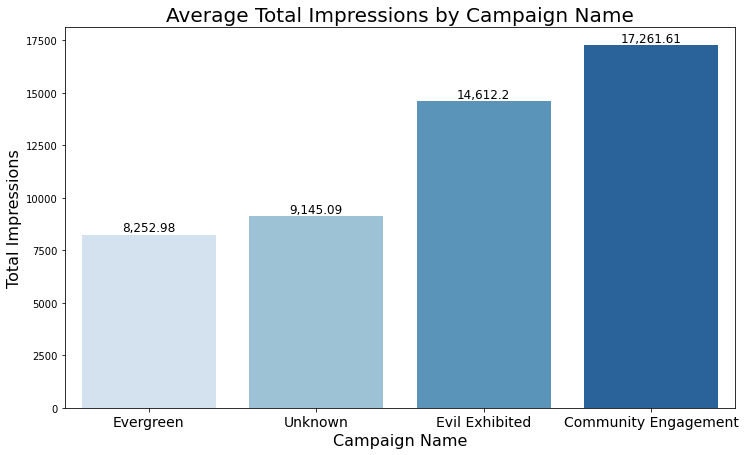

In [40]:
create_bar_plot(df = df, x = 'Campaign Name', y = 'Total Impressions', chart_type = 'average')
plt.savefig('q5_graph1.png', bbox_inches = 'tight')
plt.show()

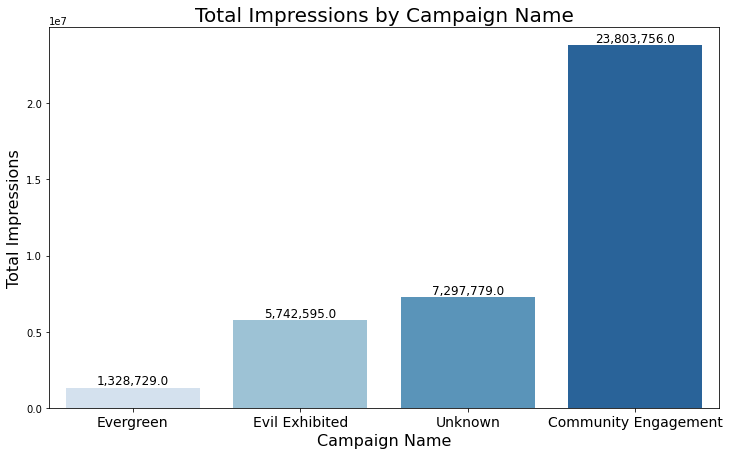

In [41]:
create_bar_plot(df = df, x = 'Campaign Name', y = 'Total Impressions', chart_type = 'total')
plt.savefig('q5_graph2.png', bbox_inches = 'tight')
plt.show()

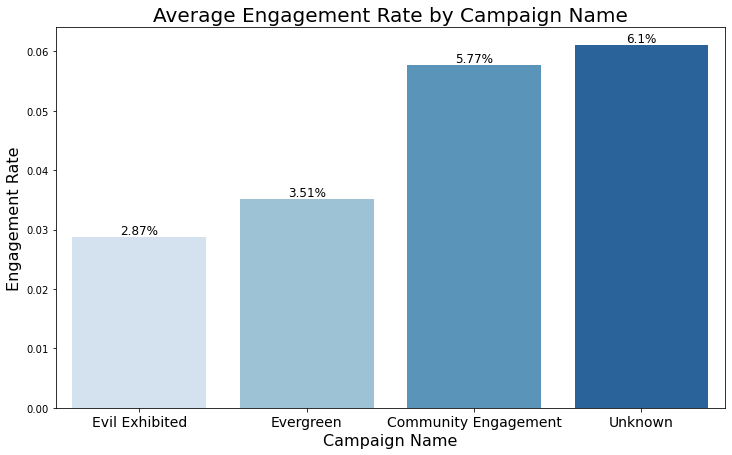

In [42]:
create_bar_plot(df = df, x = 'Campaign Name', y = 'Engagement Rate', chart_type = 'average')
plt.savefig('q5_graph3.png', bbox_inches = 'tight')
plt.show()

## Q6

In [43]:
df['Account Type'].unique()

array(['TWITTER', 'FBPAGE', 'INSTAGRAM', 'TIKTOK_BUSINESS', 'YOUTUBE',
       'LINKEDIN_COMPANY'], dtype=object)

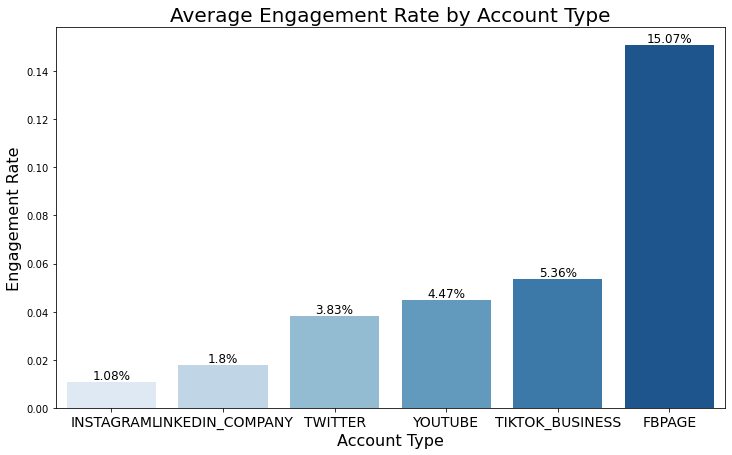

In [44]:
create_bar_plot(df = df, x = 'Account Type', y = 'Engagement Rate', chart_type = 'average')
